#การเปิดภาพ และ แสดงภาพ

In [ ]:
# ติดตั้ง OpenCV
!pip install -q opencv-python-headless

In [24]:
# นำเข้าเครื่องมือ
import cv2 #เครืองมือจัดการรูปภาพ
import matplotlib.pyplot as plt #เครื่องมือแสดงภาพ

In [26]:
# ฟังก์ชั่นแสดงภาพ
def display_image(image, title="Image"):
    # แปลงระบบ BGR เป็น RGB (Matplotlib expects RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.show()

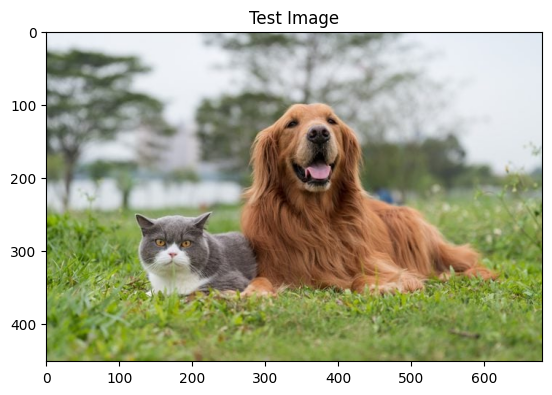

In [27]:
# โหลดรูปภาพ (ในพื้นที่local)
image_path = "test_image.jpg"
image = cv2.imread(image_path)

# เรียกใช้ฟงัก์ชั่นแสดงภาพ
display_image(image, title="Test Image")

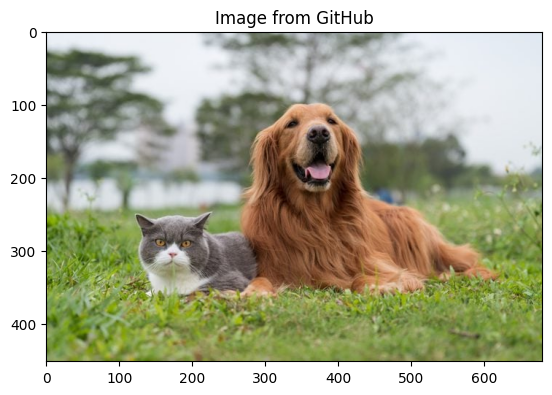

In [22]:
# โหลดรูปภาพ (จากนอกพื้นที่)
import requests
import numpy as np
# ใส่ URL
image_url = "https://raw.githubusercontent.com/chacharin/opencv_basic/main/test_image.jpg"

# ดึงรูปภาพจาก URL
response = requests.get(image_url)
image_array = np.frombuffer(response.content, np.uint8)

# จัดเก็บรูปภาพในตัวแปร image
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# แสดงผลรูปภาพ
display_image(image, title="Image from GitHub")


#การปรับขนาดและกลับด้านภาพ

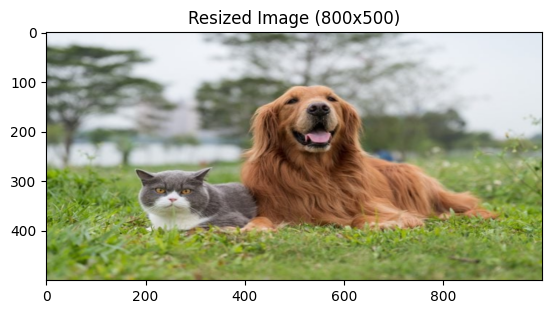

In [32]:
# ปรับขนาดภาพ
resized_image = cv2.resize(image, (1000, 500))
display_image(resized_image, title="Resized Image (800x500)")

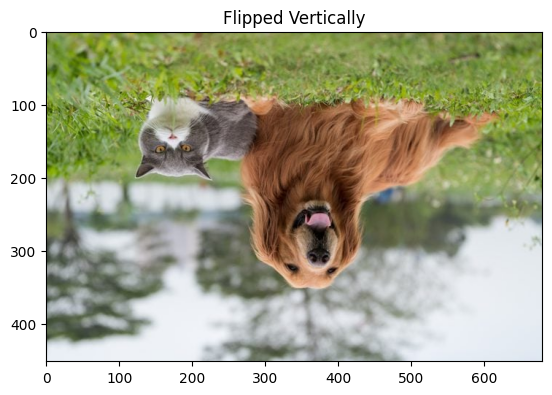

In [33]:
# กลับด้านแนวตั้ง
flipped_vertically = cv2.flip(image, 0)
display_image(flipped_vertically, title="Flipped Vertically")

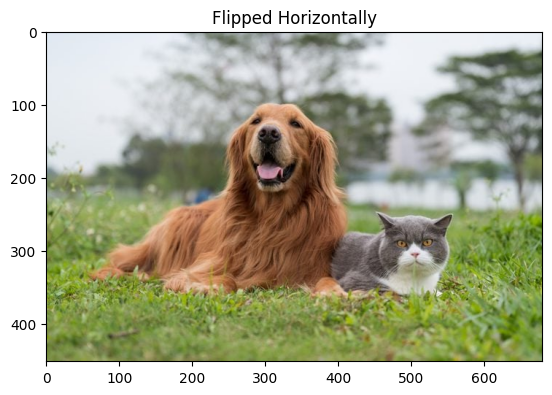

In [34]:
# กลับด้านแนวนอน
flipped_horizontally = cv2.flip(image, 1)
display_image(flipped_horizontally, title="Flipped Horizontally")

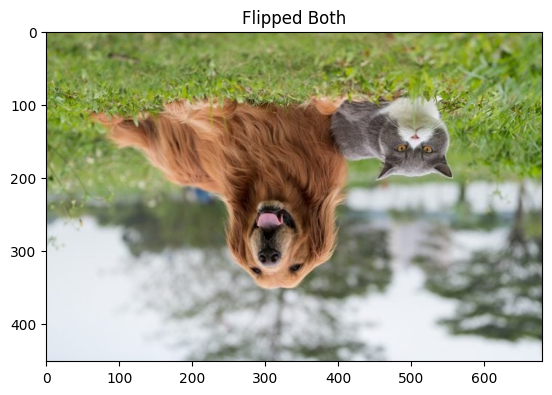

In [35]:
# กลับด้านแนวตั้งและแนวนอน
flipped_both = cv2.flip(image, -1)
display_image(flipped_both, title="Flipped Both")

#การปรับสีภาพ

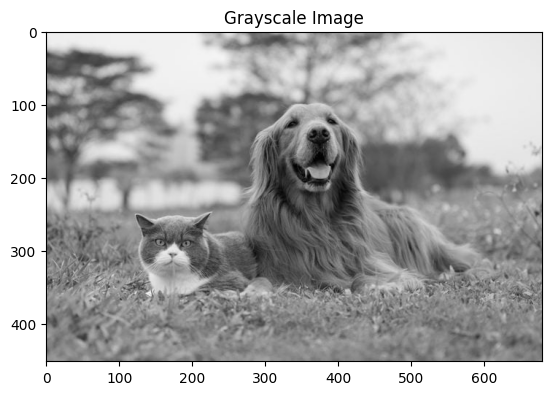

In [36]:
# ทำสีขาวดำ
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray_image, title="Grayscale Image")

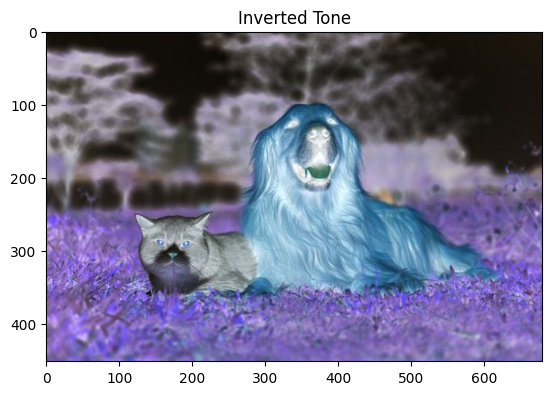

In [39]:
# ทำสีฟิลม์
inverted_image = cv2.bitwise_not(image)

display_image(inverted_image, title="Inverted Tone")


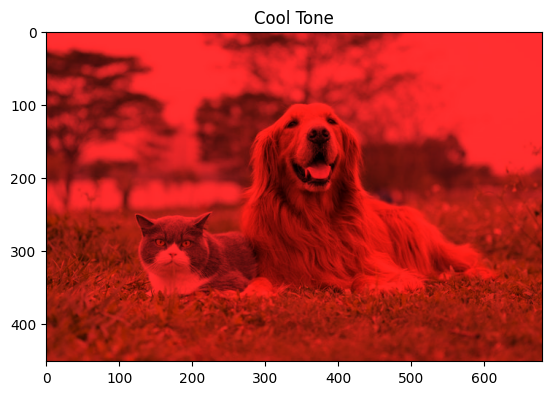

In [42]:
# เร่งสี red, green, blue
cool_filter = np.array([0.2, 0.2, 1.2])  # Multiply channels
cool_tone_image = (image.astype(np.float32) * cool_filter).clip(0, 255).astype(np.uint8)

display_image(cool_tone_image, title="Change Tone")


#การวาดเลขาคณิตในภาพ

In [47]:
# คัดลอกรูปภาพ
image_with_shapes = image.copy()

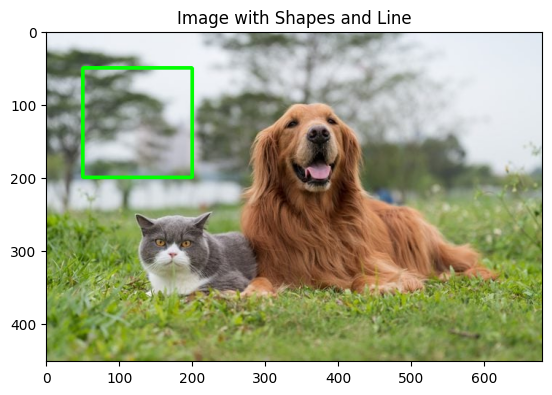

In [48]:
# วาดสี่เหลี่ยม (top-left corner (50, 50), bottom-right corner (200, 200))
cv2.rectangle(image_with_shapes, (50, 50), (200, 200), (0, 255, 0), 3)  # Green rectangle
display_image(image_with_shapes, title="Image with Shapes and Line")

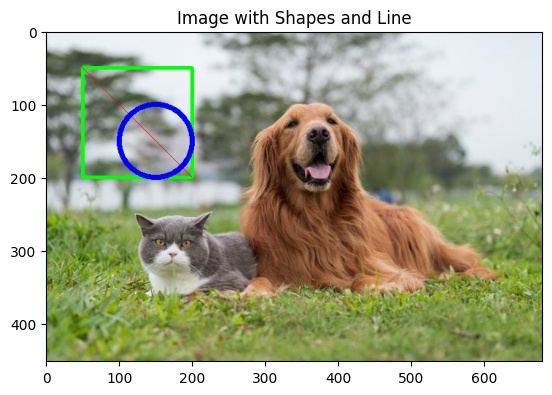

In [52]:
# วาดวงกลม (center (150, 150), radius 50)
cv2.circle(image_with_shapes, (150, 150), 50, (255, 0, 0), 6)  # Blue circle
# แสดงรูปที่วาดแล้ว
display_image(image_with_shapes, title="Image with Shapes and Line")


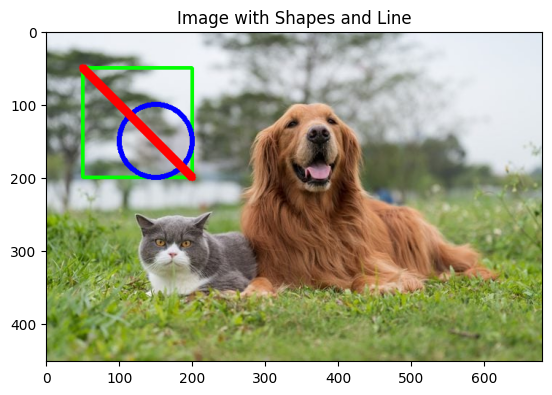

In [53]:
# วาดเส้นตรง (start point (50, 50), end point (200, 200))
cv2.line(image_with_shapes, (50, 50), (200, 200), (0, 0, 255), 9)  # Red line
# แสดงรูปที่วาดแล้ว
display_image(image_with_shapes, title="Image with Shapes and Line")

#การเขียนข้อความในภาพ

In [70]:
# คัดลอกรูปภาพ
image_with_text = image.copy()

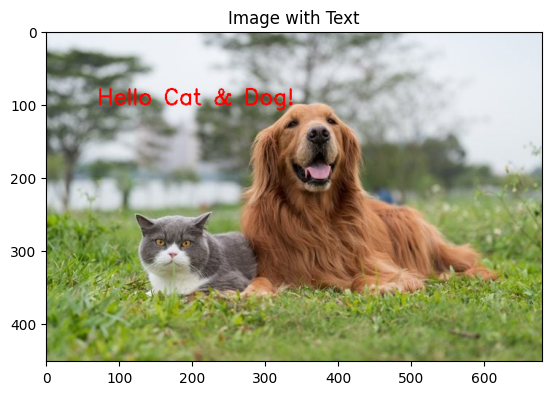

In [71]:
# เพิ่มข้อตวาม (bottom-left corner (70, 100))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image_with_text, "Hello Cat & Dog!", (70, 100), font, 1, (0, 0, 255), 2)  # Red text
# แสดงภาพ
display_image(image_with_text, title="Image with Text")

#การบันทึกไฟล์รูปภาพที่ปรับแต่งแล้ว

In [72]:
# Save
output_path = "output_image.jpg"
cv2.imwrite(output_path, image_with_text)
print(f"Image saved as {output_path}")

Image saved as output_image.jpg
